### The Set Up

In [2]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import load_model

from matplotlib import pyplot
from numpy import expand_dims


## Load the model we created

In [39]:
model = load_model('models/solar_field_classifier.h5')

In [40]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## Visualizing the Weights

In [41]:
# summarize filter shapes
for layer in model.layers:
    if 'conv' in layer.name:
        filters, biases = layer.get_weights()
        print(layer.name, filters.shape)

conv2d (3, 3, 3, 16)
conv2d_1 (3, 3, 16, 32)
conv2d_2 (3, 3, 32, 16)


In [42]:
filters, biases = model.layers[0].get_weights()

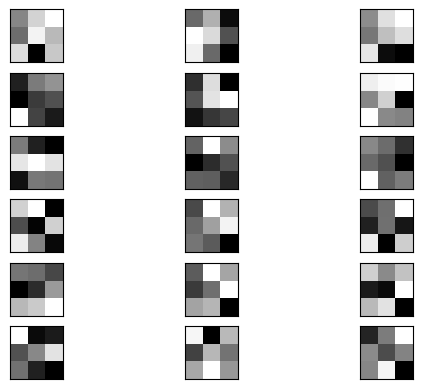

In [46]:
#Visualizing the first 6 filters (of 16) in the first layer of the CNN
#Dark squares correspond to large weights, and light squares correspond to lighter weights

filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
    # specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

Here the rows of each kernel corresponds with our RGB channels

## Visualizing the Feature Maps

In [23]:
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
 # check for convolutional layer
    if 'conv' in layer.name:
    # summarize output shape
        print(i, layer.name, layer.output.shape)

0 conv2d (None, 254, 254, 16)
2 conv2d_1 (None, 125, 125, 32)
4 conv2d_2 (None, 60, 60, 16)


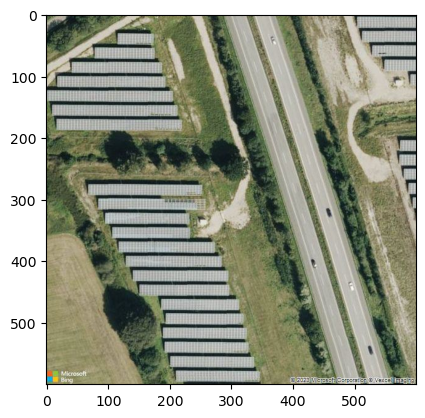

In [59]:
from keras.models import Model
import tensorflow as tf
import numpy as np
import cv2

image1 = r'BingMaps Test Images\Positive\positive_Germany_Bollingstedt 1.2 solar farm.jpg'
image2 = r'BingMaps Test Images\Positive\positive_Italy_Alfonsine Solar Park.jpg'

read = cv2.imread(image)
pyplot.imshow(cv2.cvtColor(read, cv2.COLOR_BGR2RGB))
pyplot.show()
              
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
# load the image 
img = load_img(image)
resized = tf.image.resize(img, (256, 256))
scaled = resized/255
img = np.expand_dims(scaled, 0)


In [34]:
# get feature map for first hidden layer
feature_maps = model.predict(img)

1/1 [==============================] - 0s 35ms/step


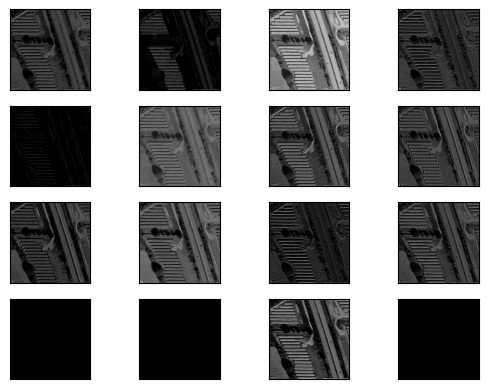

In [35]:

# plot all 64 maps in an 8x8 squares
square = 4
ix = 1
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

### Do this for all convolution layers

1/1 [==============================] - 0s 50ms/step


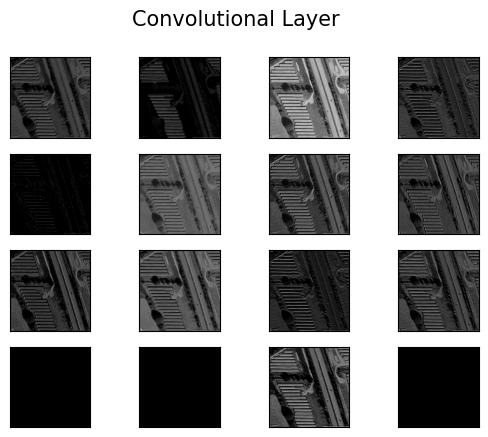

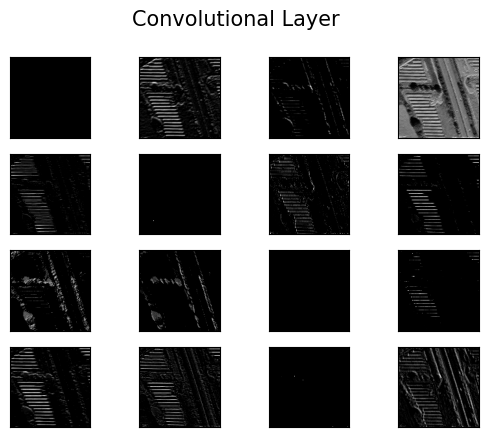

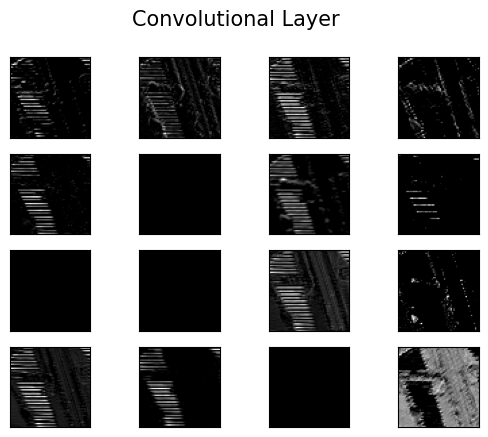

In [54]:
# redefine model to output right after the first hidden layer
ixs = [0, 2, 4]
outputs = [model.layers[i].output for i in ixs]
model3 = Model(inputs=model.inputs, outputs=outputs)

# get feature map for first hidden layer
feature_maps = model3.predict(img)
# plot the output from each block
square = 4

for fmap in feature_maps:
    ix=1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
# show the figure
    pyplot.suptitle('Convolutional Layer', fontsize=15)
    pyplot.show()